In [8]:
%load_ext autoreload
%autoreload 2
from gratin.standard import train_model, load_model, plot_demo, get_predictions
import matplotlib.pyplot as plt
import socket

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
if "jbmasson" in socket.gethostname():
    export_path = "/home/hverdier/Gaia/hecat/hippo/models/andi_17may2022"
else:
    export_path = "/Users/hverdier/models/demo"

stage is None, strange...
Create TrajDataset, seed_offset = 100000
Create TrajDataset, seed_offset = 0
Create TrajDataset, seed_offset = 200000
Create TrajDataset, seed_offset = 100000


Sanity Checking: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 200000


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 300000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 400000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 500000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 600000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 700000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 800000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 900000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1000000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1100000
Create TrajDataset, seed_offset = 1200000
Create TrajDataset, seed_offset = 1200000


/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
alpha_test_MeanAbsoluteError    0.24776369333267212
      alpha_test_loss            0.3000807464122772
     model_test_F1Score          0.6794871687889099
      model_test_loss           0.45836591720581055
         test_loss               0.6970672607421875
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'alpha_test_loss': 0.3000807464122772, 'alpha_test_MeanAbsoluteError': 0.24776369333267212, 'model_test_loss': 0.45836591720581055, 'model_test_F1Score': 0.6794871687889099, 'test_loss': 0.6970672607421875}]
Create TrajDataset, seed_offset = 1200000


2022-08-04 10:40:15.646370: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ParametricUMAP(encoder=<keras.engine.sequential.Sequential object at 0x7fdcd4f34d00>, optimizer=<keras.optimizer_v2.adam.Adam object at 0x7fdcd4f34700>)
Thu Aug  4 10:40:15 2022 Construct fuzzy simplicial set
Thu Aug  4 10:40:15 2022 Finding Nearest Neighbors
Thu Aug  4 10:40:15 2022 Building RP forest with 10 trees
Thu Aug  4 10:40:15 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Thu Aug  4 10:40:39 2022 Finished Nearest Neighbor Search
Thu Aug  4 10:40:42 2022 Construct embedding
Epoch 1/10
6362/6362 [==============================] - 51s 7ms/step - loss: 0.1540
Epoch 2/10
6362/6362 [==============================] - 45s 7ms/step - loss: 0.1425
Epoch 3/10
6362/6362 [==============================] - 55s 9ms/step - loss: 0.1412
Epoch 4/10
6362/6362 [==============================] - 53s 8ms/step - loss: 0.1403
Epoch 5/10
6362/6362 [==============================] - 52s 8ms/step - loss: 0.1399
Epoch 6/10
6362/63

2022-08-04 10:48:45.797460: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/hverdier/models/demo/umap/assets


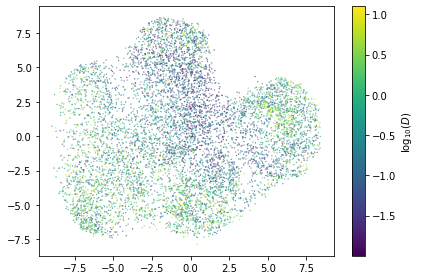

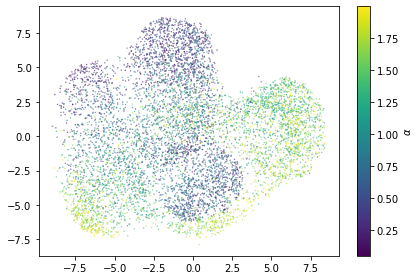

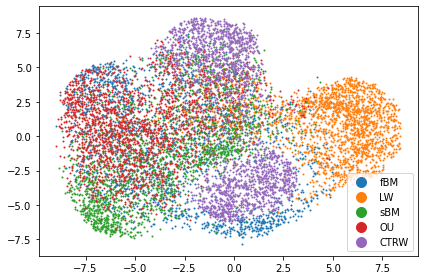

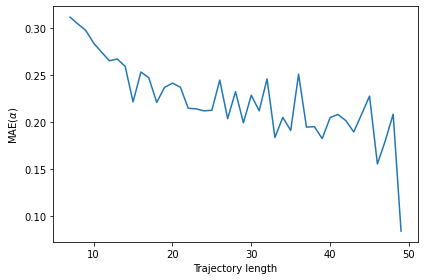

In [5]:
model, encoder = train_model(
    export_path= export_path,
    max_n_epochs=50,
    length_range=(7,50),
    num_workers=4,
    time_delta_range=(.005,1.))

In [4]:
model, encoder = load_model(export_path)

2022-05-19 15:06:41.933151: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-19 15:06:41.933822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Quadro P6000 computeCapability: 6.1
coreClock: 1.645GHz coreCount: 30 deviceMemorySize: 23.87GiB deviceMemoryBandwidth: 403.49GiB/s
2022-05-19 15:06:41.933866: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-05-19 15:06:41.933924: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-19 15:06:41.933965: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-05-19 15:06:41.934012: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

In [ ]:
plot_demo(model,encoder,num_workers=4,time_delta=0.03,length_range=(10,500))

In [17]:
import numpy as np

D = 0.1
dfs = {}
L = 15
for delta_t in [0.005,0.01,0.03,.1]:
    trajs = [np.cumsum(np.random.randn(L,2)*np.sqrt(2*D*delta_t),axis=0)  + np.random.normal(loc=0,scale=0.03,size=(L,2)) for _ in range(1000)]
    times = [np.arange(traj.shape[0])*delta_t for traj in trajs]
    dfs[delta_t] = get_predictions(model, encoder, trajs, times)

/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


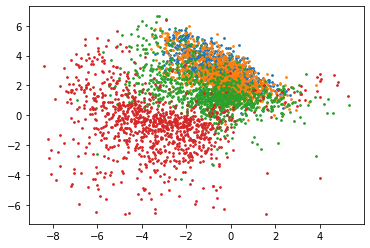

In [18]:
for delta_t in dfs:
    plt.scatter(dfs[delta_t]["U_1"],dfs[delta_t]["U_2"],s=3)

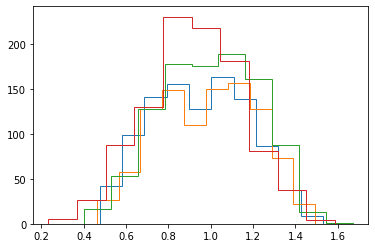

In [19]:
for delta_t in dfs:
    plt.hist(dfs[delta_t]["alpha"],histtype="step")

Text(0.5, 0, 'Inferred $\\alpha$')

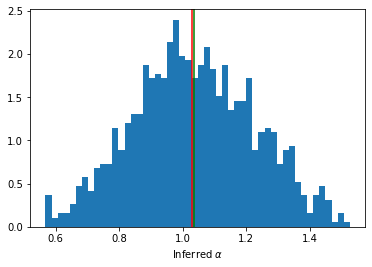

In [11]:
import matplotlib.pyplot as plt
plt.hist(df["alpha"],density=True,bins=50)
plt.axvline(df["alpha"].mean(),label="Mean",c="green")
plt.axvline(df["alpha"].median(),label="Median",c="red")
plt.xlabel("Inferred $\\alpha$")